# Customer Personality Analysis

## Objective

Company need insight from customer personality analysis. Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## Attributes

### 1. People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### 2. Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### 3. Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### 4. Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploring Dataset

In [2]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* The shape of this dataset is 2240 rows & 29 columns.
* Income is the only feature which has few missing value.
* Dt_Customer dtype must be date.

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Z_CostContact & Z_Revenue only have 1 unique value. Therefore i will drop these features because aren't useful for model.

In [6]:
df.duplicated().sum()

0

# Data Cleaning

In this section, i will handle missing values, correct data type & replace categorical values.

In [7]:
print(df["Education"].unique())
print(df["Marital_Status"].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


The categorical values of these variables can be combined such as
* Education: Graduate (Graduation, 2n Cycle), Postgraduate (PhD, Master), & Undergraduate (Basic).
* Marital_Status: Relationship (Together, Married) & Single (Divorced, Widow, Alone, Absurd, YOLO).

In [8]:
# Replace
df["Education"] = df["Education"].replace(["Graduation", "2n Cycle"], "Graduate") 
df["Education"] = df["Education"].replace(["PhD", "Master"], "Postgraduate")
df["Education"] = df["Education"].replace(["Basic"], "Undergraduate")

df["Marital_Status"] = df["Marital_Status"].replace(["Together", "Married"], "Relationship")
df["Marital_Status"] = df["Marital_Status"].replace(["Divorced", "Widow", "Alone", "Absurd", "YOLO"], "Single")

# Missing Values
df["Income"] = df["Income"].fillna(df["Income"].median())

# Datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Column Name
df.columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsUsed', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# Feature Engineering

In this section, i will create new features & drop useless features. The features that i will create are as follows:
* Kids:Total kid in customer's household.
* TotMember: Total member in customer's household.
* MntAllProds: Amount spent on all products in last 2 years.
* NumAcceptedCmp: Total customer accepted the offer.
* NumAllPurchases: Total customer purchases.
* Age: Customer age calculated in 2023.
* Enrollment_Age: Age of customer's enrollment with the company calculated in 2023.

In [9]:
# Kids = sum of Kidhome & Teenhome
df["Kids"] = df["Kidhome"] + df["Teenhome"]

# TotMember = sum of Marital_Status (if single count as 1 person otherwise as 2) and Kids
df["TotMember"] = df["Marital_Status"].apply(lambda x: 1 if x == "Single" else 2) + df["Kids"]

# MntAllProds = sum of MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, & MntGoldProds
df["MntAllProds"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# NumAcceptedCmp = sum of AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5
df["NumAcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

# NumAllPurchases = sum of NumWebPurchases, NumCatalogPurchases, NumStorePurchases
df["NumAllPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# Age
df["Age"] = datetime.datetime.now().year - df["Year_Birth"]

# Enrollment_Age
df["Enrollment_Age"] = datetime.datetime.now().year - df["Dt_Customer"].dt.year

# MostSpentOn
for i in range(df.shape[0]):
    df.loc[i, "MostSpentOn"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].iloc[i, :].idxmax()[3:]

In [10]:
# Drop Columns
df = df.drop(
    [
        "ID",
        "Year_Birth",
        "Kidhome",
        "Teenhome",
        "Dt_Customer",
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
        "NumWebPurchases",
        "NumCatalogPurchases",
        "NumStorePurchases",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "Z_CostContact",
        "Z_Revenue"
    ],
    axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   NumDealsUsed       2240 non-null   int64  
 5   NumWebVisitsMonth  2240 non-null   int64  
 6   Complain           2240 non-null   int64  
 7   Response           2240 non-null   int64  
 8   Kids               2240 non-null   int64  
 9   TotMember          2240 non-null   int64  
 10  MntAllProds        2240 non-null   int64  
 11  NumAcceptedCmp     2240 non-null   int64  
 12  NumAllPurchases    2240 non-null   int64  
 13  Age                2240 non-null   int64  
 14  Enrollment_Age     2240 non-null   int64  
 15  MostSpentOn        2240 non-null   object 
dtypes: float64(1), int64(12)

# Exploratory Data Analysis

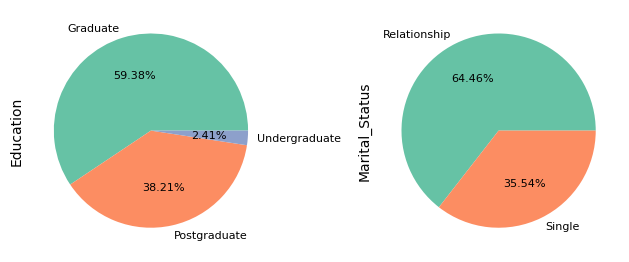

In [11]:
for i in range(2):
    plt.subplot(1, 2, i + 1)
    df.iloc[:, i].value_counts().plot(kind="pie",
                                      autopct="%.2f%%",
                                      textprops={'fontsize': 8},
                                      colors=sns.color_palette("Set2"))
    
plt.tight_layout()

* The majority of customer education is graduate & followed by postgraduate.
* Most marital status of customers are in relationship.

https://engineeringfordatascience.com/posts/matplotlib_subplots/

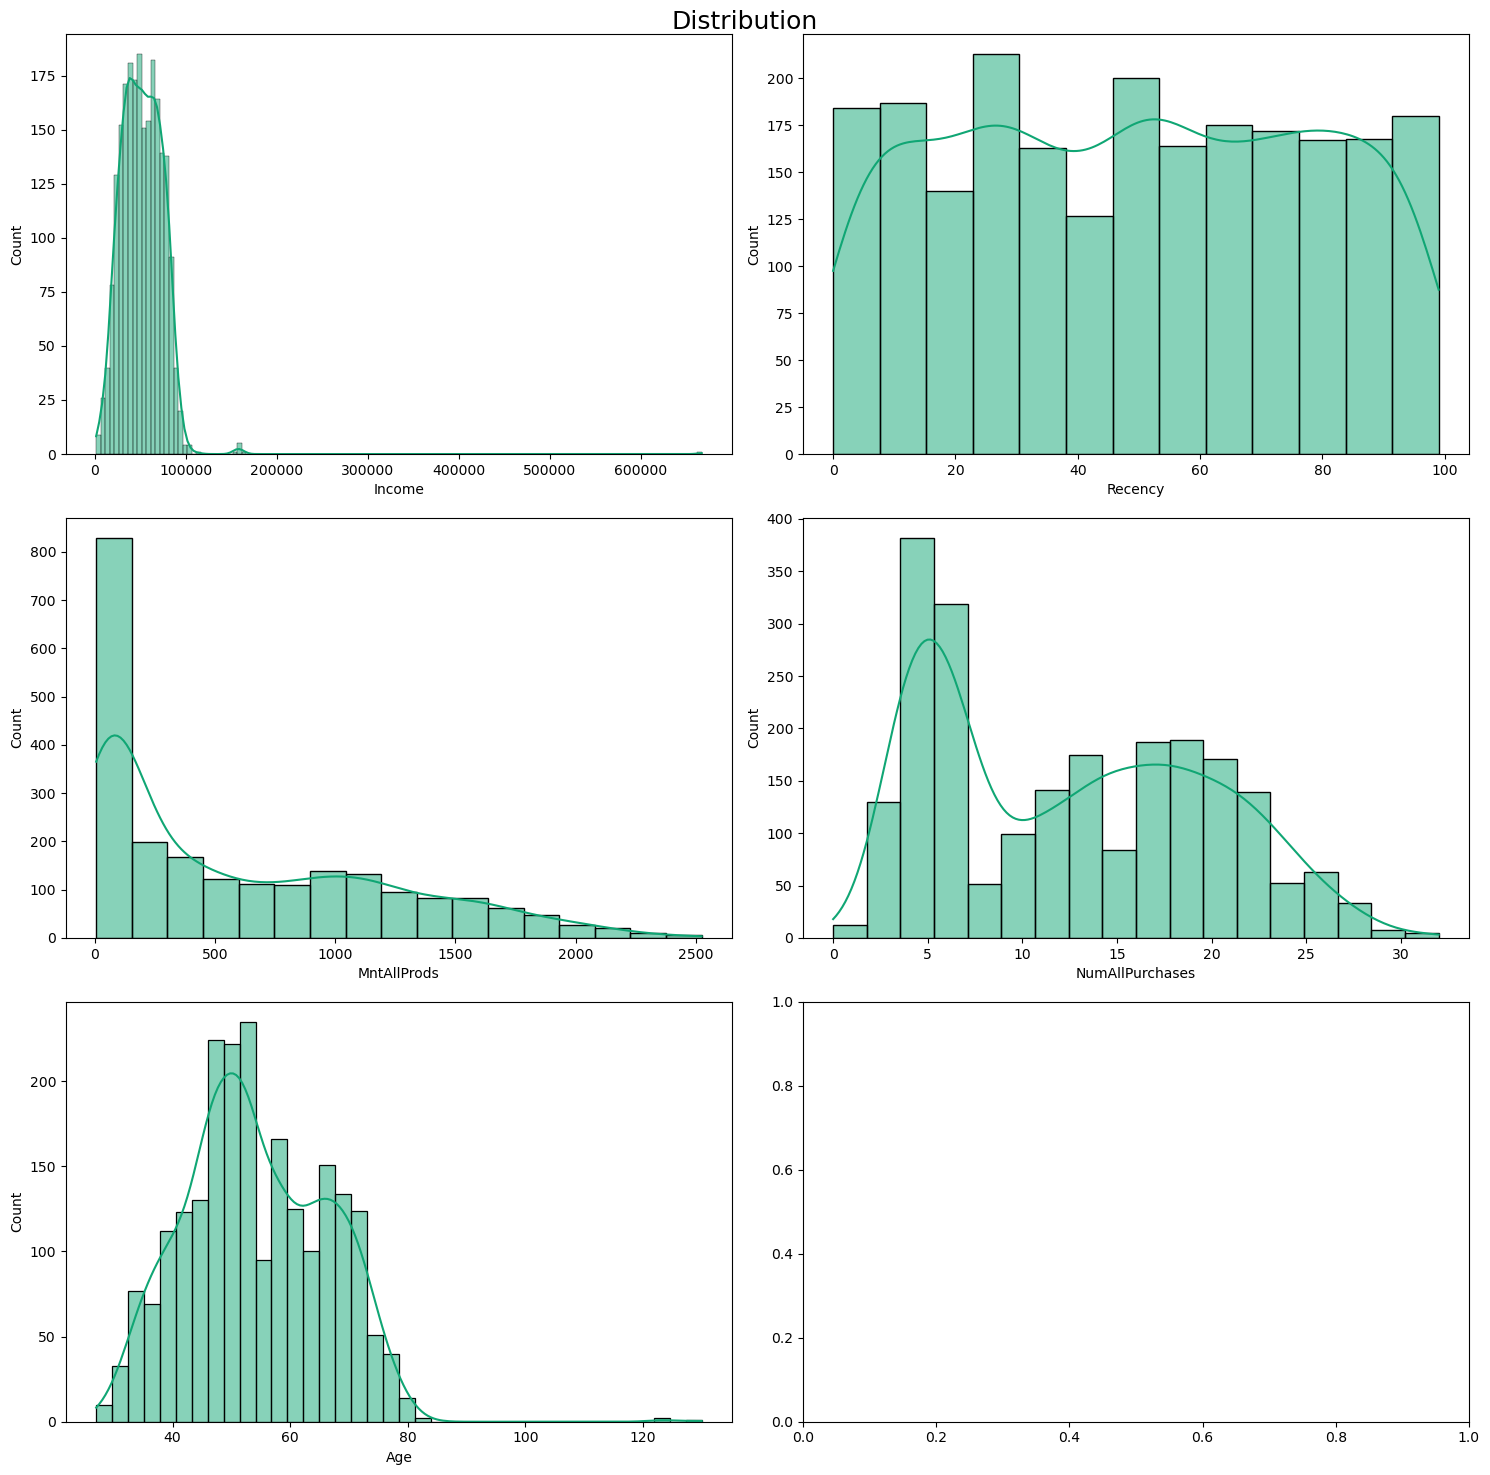

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution", fontsize=18)

for col, ax in zip(["Income", "Recency", "MntAllProds", "NumAllPurchases", "Age"], axs.ravel()):
    sns.histplot(x=df[col], kde=True, ax=ax, color=sns.xkcd_rgb["bluish green"])
    
plt.tight_layout()

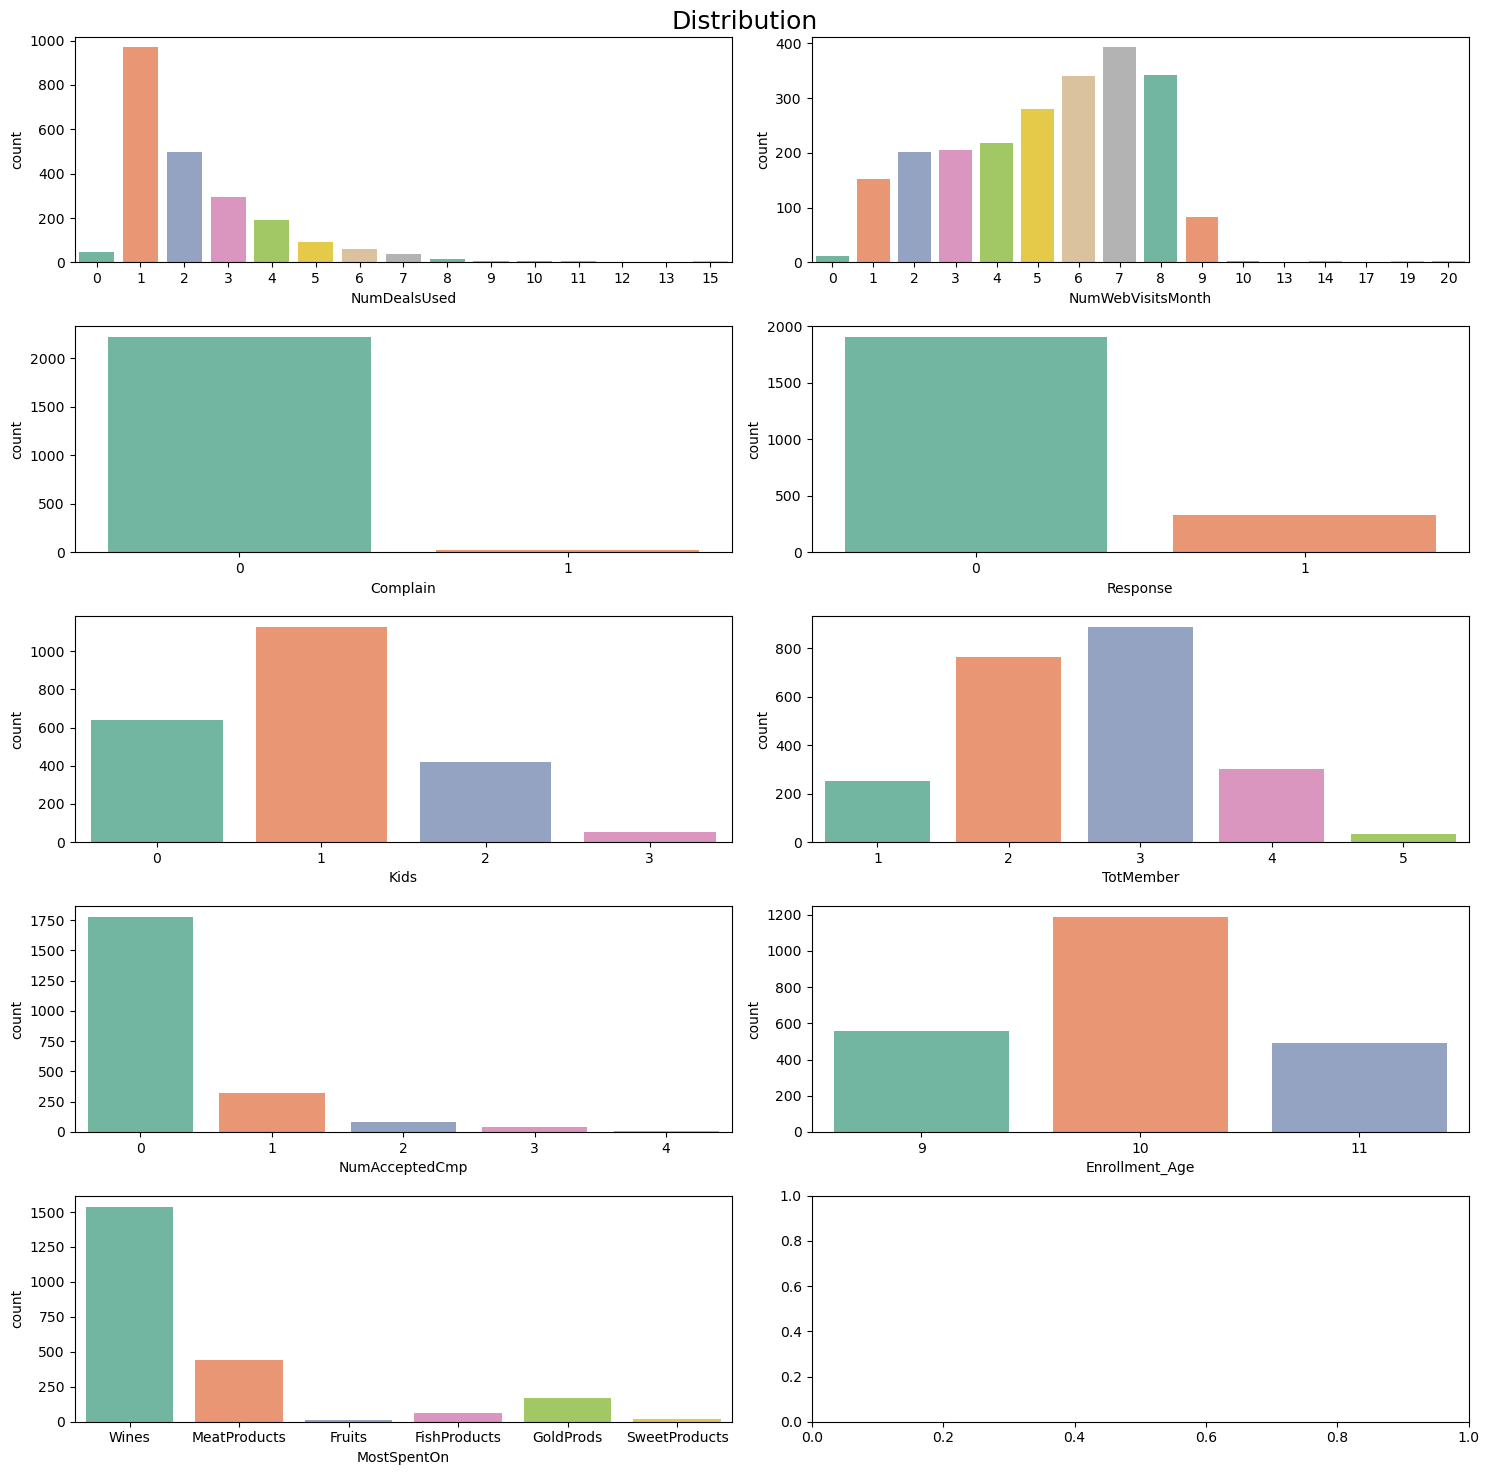

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution", fontsize=18)

for col, ax in zip(["NumDealsUsed", "NumWebVisitsMonth", "Complain", "Response", "Kids", "TotMember", "NumAcceptedCmp", "Enrollment_Age", "MostSpentOn"], axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.countplot(x=df[col], ax=ax, palette="Set2")
    
plt.tight_layout()

# Data Pre-processing

In [14]:
# Encoding
encoder = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), [15]),
                  ("ordinal", OrdinalEncoder(), [0, 1])],
    remainder="passthrough"
)

# Pipeline (Encoding -> Normalization -> PCA)
pipeline = Pipeline(steps=[("encoder", encoder),
                           ("scaler", MinMaxScaler()),
                           ("pca", PCA(n_components=2))],
                    verbose=True)

In [15]:
df_final = pipeline.fit_transform(df)

[Pipeline] ........... (step 1 of 3) Processing encoder, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing pca, total=   0.0s


# Modelling

In [16]:
def find_k(X, K):
    """
    Find the optimal number of clusters (k) using Elbow Method & Silhoutte Score.
    """
    wcss, slh = {}, {}
    
    for k in range(1, K + 1):
        kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X)
        clusters = kmeans.labels_
        wcss[k] = kmeans.inertia_
        if k != 1:
            slh[k] = silhouette_score(X, clusters)
    
    # Elbow Method Plot
    plt.plot(list(wcss.keys()), list(wcss.values()), "go-")
    plt.title("Elbow Method")
    plt.xlabel("$k$")
    plt.ylabel("WCSS")
    plt.show()
    
    # Silhoutte Score Plot
    plt.plot(list(slh.keys()), list(slh.values()), "go-")
    plt.title("Silhoutte Score")
    plt.xlabel("$k$")
    plt.ylabel("Score")
    plt.show()

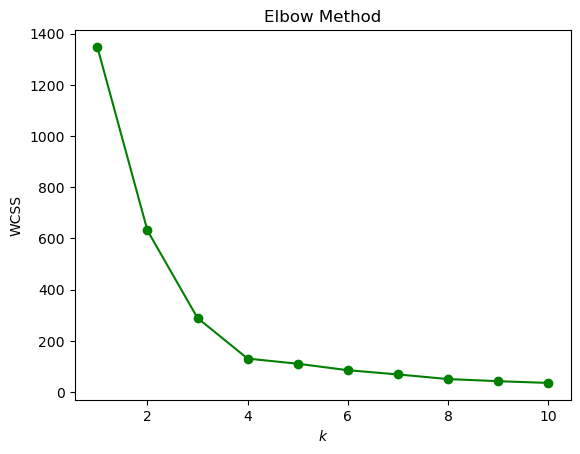

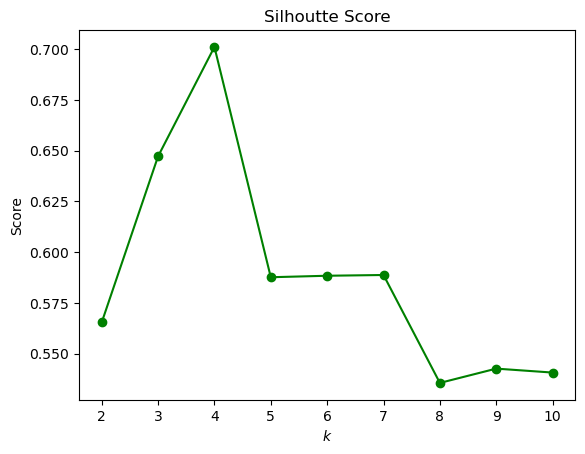

In [17]:
find_k(X=df_final, K=10)

* From the elbow method & silhoutte score, the best k value is 4.

In [18]:
kmeans = KMeans(n_clusters=2, n_init="auto", random_state=42).fit(df_final)
df["Cluster"]= kmeans.labels_

# Conclusion

(-1.25, 1.25, -1.25, 1.25)

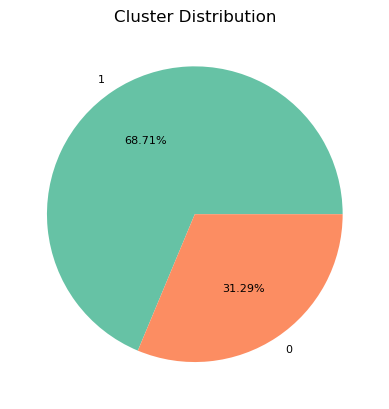

In [19]:
df["Cluster"].value_counts().plot(kind="pie", 
                                  autopct="%.2f%%",
                                  textprops={'fontsize': 8},
                                  colors=sns.color_palette("Set2"))
plt.title("Cluster Distribution")
plt.axis("off")

* Most customers is in cluster 1 and followed by cluster 2.

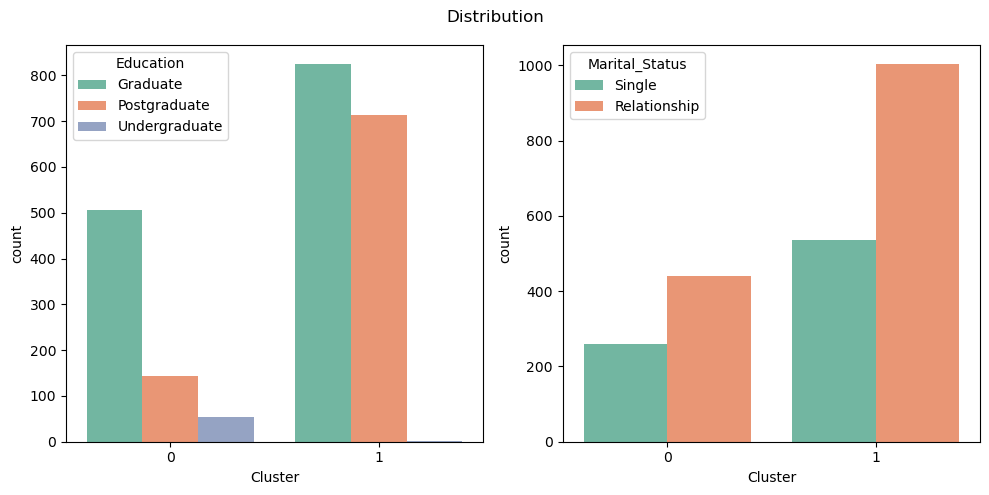

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution")

for col, ax in zip(["Education", "Marital_Status"], axs.ravel()):
    sns.countplot(data=df, x="Cluster", hue=col, ax=ax, palette="Set2")
    
plt.tight_layout()

* All clusters are dominated by graduates. Only clusters 0 & 3 have undergraduate.
* Most of the marital status of clusters 0 & 1 are in relationship, while most of the other clusters are single.

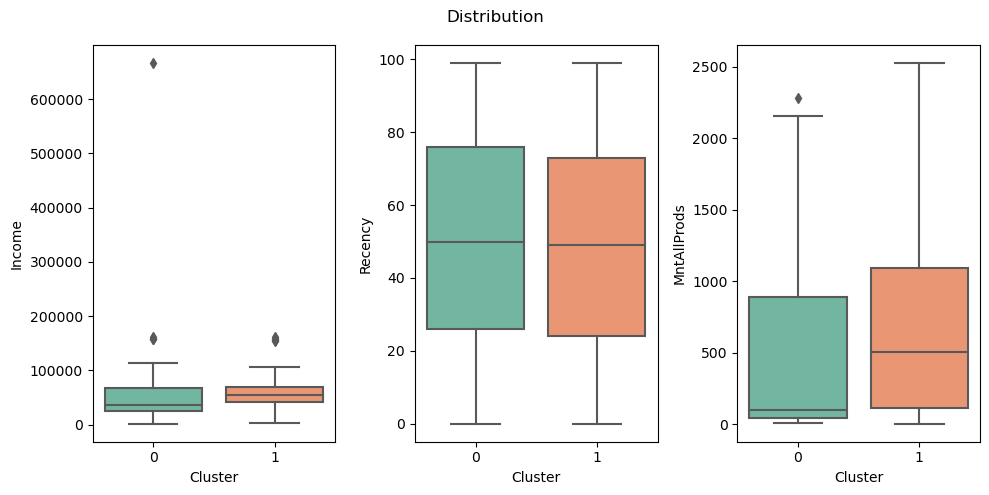

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution")

for col, ax in zip(["Income", "Recency", "MntAllProds"], axs.ravel()):
    sns.boxplot(data=df, x="Cluster", y=col, ax=ax, palette="Set2")
    
plt.tight_layout()

* Clusters with relatively high income are cluster 1 & 2.
* Cluster 1 & 2 also have relatively high amount spent on all products while the amount spent of other clusters is much smaller.
* For recency, there are not so much difference.
* Advice for company: continue to focus on clusters 1 & 2 because they have a lot of income and the amount spent is very large.

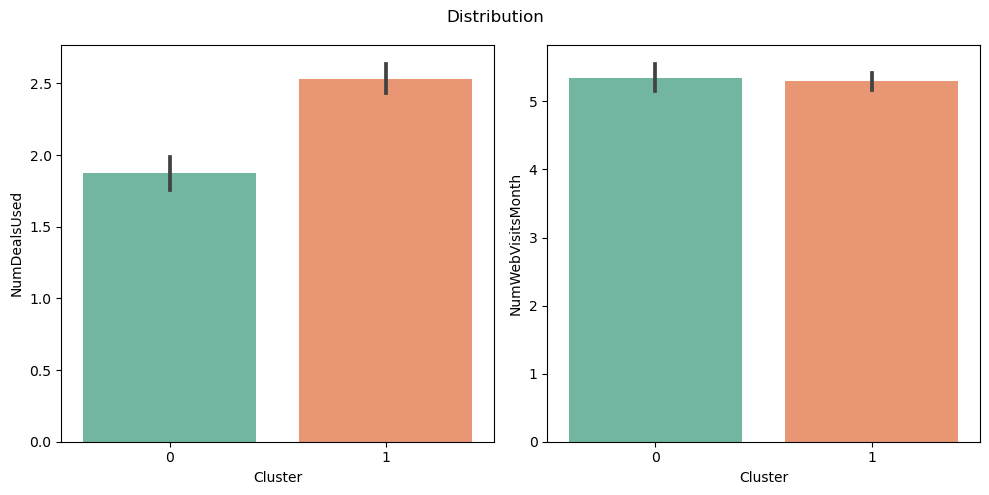

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution")

for col, ax in zip(["NumDealsUsed", "NumWebVisitsMonth"], axs.ravel()):
    sns.barplot(data=df, x="Cluster", y=col, palette="Set2", ax=ax)

plt.tight_layout()

* Clusters 1 & 2 are the clusters that use the most promos.
* For the number of web visits there tends to be not much difference between each clusters.

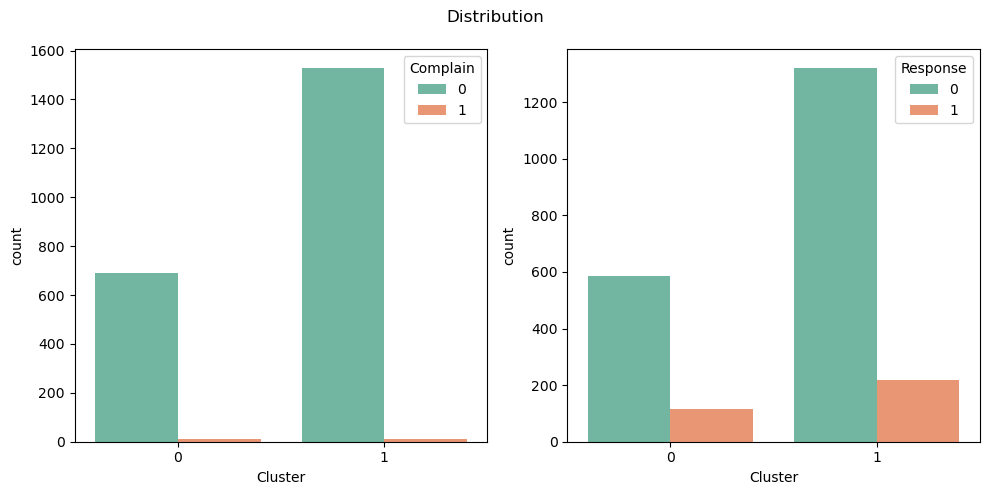

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution")

for col, ax in zip(["Complain", "Response"], axs.ravel()):
    sns.countplot(data=df, x="Cluster", hue=col, palette="Set2", ax=ax)

plt.tight_layout()

* There are not so many complains from each cluster, there are very few complains.
* The percentage that responds is low, especially in cluster 1.

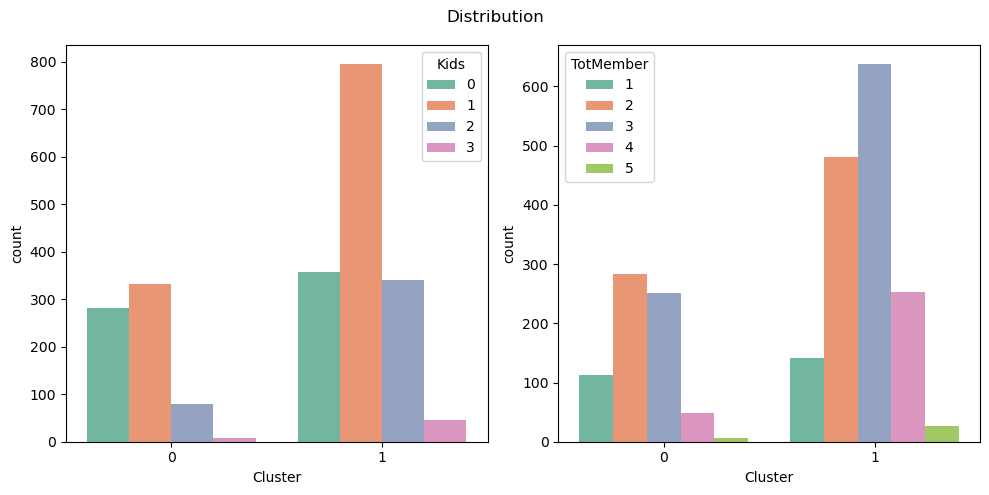

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution")

for col, ax in zip(["Kids", "TotMember"], axs.ravel()):
    sns.countplot(data=df, x="Cluster", hue=col, palette="Set2", ax=ax)

plt.tight_layout()

* Cluster 0, 1, & 2 have many 1 children while the majority of cluster 3 don't have children.
* Most of cluster 0 & 1 have a total of 3 members at home, while the other clusters have 2.

<Axes: xlabel='Age', ylabel='Density'>

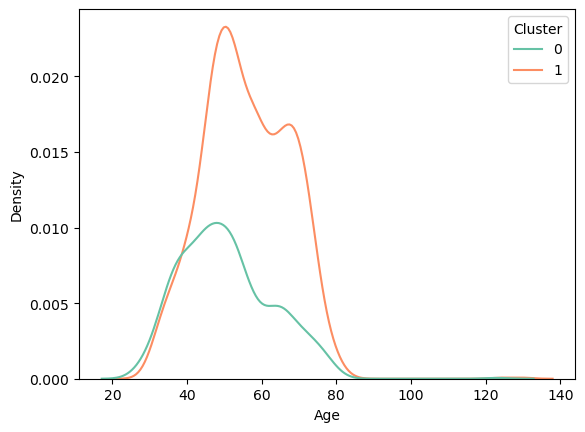

In [25]:
sns.kdeplot(data=df, x="Age", hue="Cluster", palette="Set2")

* Cluster 1 & 2 tends to older, while the others tend to younger.

<Axes: xlabel='Cluster', ylabel='count'>

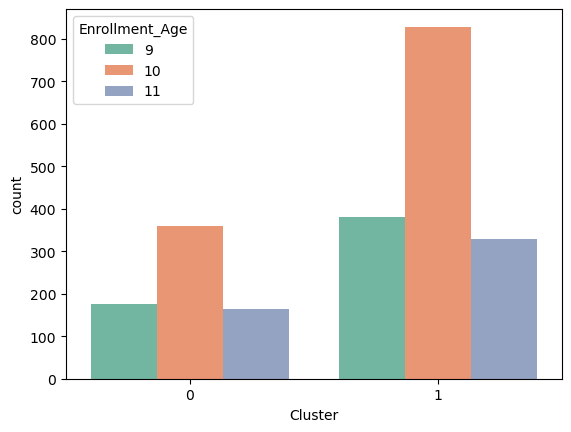

In [26]:
sns.countplot(data=df, x="Cluster", hue="Enrollment_Age", palette="Set2")

* Enrollment age from each cluster is dominated by 10 years.

<Axes: xlabel='Cluster', ylabel='count'>

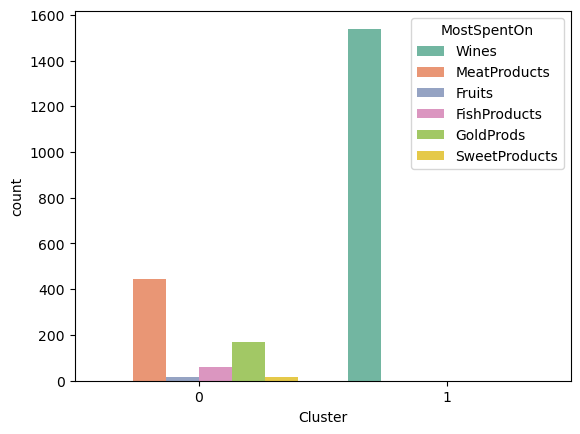

In [27]:
sns.countplot(data=df, x="Cluster", hue="MostSpentOn", palette="Set2")

* All customers from clusters 1 & 2 spend more on wine products than other products.
* Most customers from clusters 0 & 3 spend more on meats products than other products.